In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('NoNullData.csv', index_col=0)
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [3]:
data.shape

(2919, 81)

In [4]:
df_train = data.loc[data['SalePrice'].notnull(), :].copy()
df_test = data.loc[data['SalePrice'].isnull(), :].copy()

In [5]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 81)



### For Categorical variables:

1. Plot boxplot to see relationships.
2. List pvals from lowest to highest in Anova analysis for categories in each variable.
3. Transform categorical variables into sequential data ordering (based on mean)

### Num and Ordered Transformed Cat variables together:

1. Plot pair-wise graph
2. List variables with linear relationship with the output variable.
3. List variables with quadratic relationship with the output variable.
4. List variables with other non-linear relationship with the output variable.
5. Plot correlation matrix.
6. List variables with high correlation with the output variable.
7. List all the pairs of variables with high colinearlity.
8. Plot Spearman correlation to inspect non-linear relationship (monotonic increasing or decreasing)

In [6]:
df_train['MSSubClass'] = df_train.loc[:,'MSSubClass'].astype(str)

In [7]:
quants = []
qualits = []
for col in df_train.columns:
    if df_train[col].dtype == object:
        qualits.append(col)
    else:
        quants.append(col)
        
quants.remove('SalePrice')
print (str(len(quants)) + ' quantative variabls: ')
print (quants)
print ()
print (str(len(qualits)) + ' qualitative variables: ')
print (qualits)

36 quantative variabls: 
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

44 qualitative variables: 
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVn

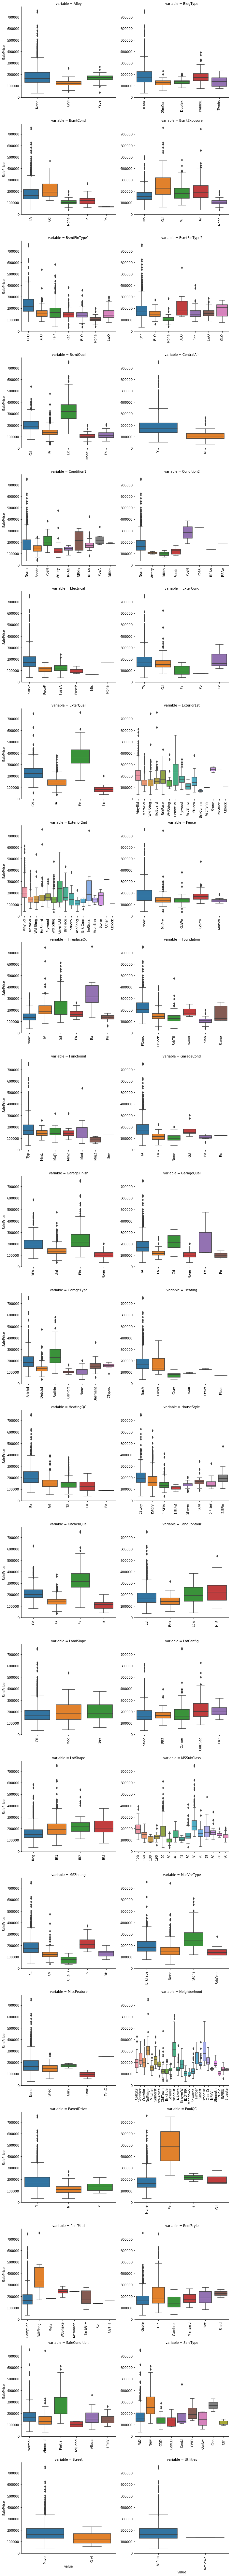

In [8]:
def boxplot(x, y, **kwarges):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualits)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value', 'SalePrice')

In [9]:
import scipy.stats as stats

#anova test

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualits
    pvals = []
    for c in qualits:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)

In [10]:
a.head()

,feature,pval
35,Neighborhood,1.558600e-225
12,ExterQual,1.439551e-204
6,BsmtQual,8.158548e-196
26,KitchenQual,3.032213e-192
20,GarageFinish,6.228747e-115


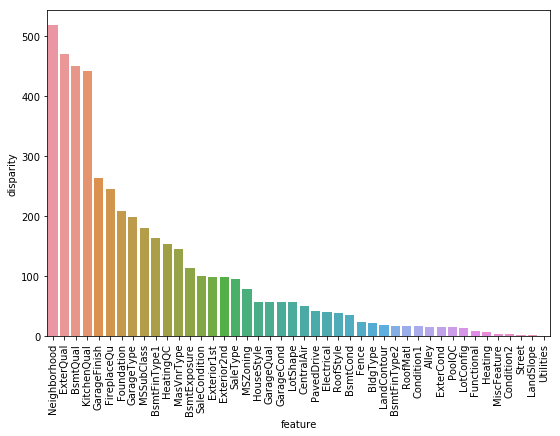

In [11]:
plt.figure(figsize=(9,6))
a['disparity'] = np.log(1.0/a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [12]:
significant_qualits = a.loc[a['pval']<0.05, :]
significant_qualits.head()

,feature,pval,disparity
35,Neighborhood,1.558600e-225,517.637858
12,ExterQual,1.439551e-204,469.363028
6,BsmtQual,8.158548e-196,449.207612
26,KitchenQual,3.032213e-192,440.987045
20,GarageFinish,6.228747e-115,262.968110


In [13]:
# encoding - base on mean and encode the categorical data into sequential ints, 1, 2, 3, ...

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
        
qual_encoded = []
for q in qualits:
    encode(data, q)
    qual_encoded.append(q+'_E')
print (qual_encoded)



['Alley_E', 'BldgType_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'BsmtQual_E', 'CentralAir_E', 'Condition1_E', 'Condition2_E', 'Electrical_E', 'ExterCond_E', 'ExterQual_E', 'Exterior1st_E', 'Exterior2nd_E', 'Fence_E', 'FireplaceQu_E', 'Foundation_E', 'Functional_E', 'GarageCond_E', 'GarageFinish_E', 'GarageQual_E', 'GarageType_E', 'Heating_E', 'HeatingQC_E', 'HouseStyle_E', 'KitchenQual_E', 'LandContour_E', 'LandSlope_E', 'LotConfig_E', 'LotShape_E', 'MSSubClass_E', 'MSZoning_E', 'MasVnrType_E', 'MiscFeature_E', 'Neighborhood_E', 'PavedDrive_E', 'PoolQC_E', 'RoofMatl_E', 'RoofStyle_E', 'SaleCondition_E', 'SaleType_E', 'Street_E', 'Utilities_E']


In [14]:
data[qual_encoded].head()

,Alley_E,BldgType_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,BsmtQual_E,CentralAir_E,Condition1_E,Condition2_E,...,MiscFeature_E,Neighborhood_E,PavedDrive_E,PoolQC_E,RoofMatl_E,RoofStyle_E,SaleCondition_E,SaleType_E,Street_E,Utilities_E
0,3.0,5.0,4.0,2.0,7.0,6.0,4.0,2.0,5.0,5.0,...,4.0,17.0,3.0,1.0,3.0,2.0,5.0,5.0,2.0,2.0
1,3.0,5.0,4.0,5.0,5.0,6.0,4.0,2.0,3.0,5.0,...,4.0,21.0,3.0,1.0,3.0,2.0,5.0,5.0,2.0,2.0
2,3.0,5.0,4.0,3.0,7.0,6.0,4.0,2.0,5.0,5.0,...,4.0,17.0,3.0,1.0,3.0,2.0,5.0,5.0,2.0,2.0
3,3.0,5.0,5.0,2.0,5.0,6.0,3.0,2.0,5.0,5.0,...,4.0,18.0,3.0,1.0,3.0,2.0,2.0,5.0,2.0,2.0
4,3.0,5.0,4.0,4.0,7.0,6.0,4.0,2.0,5.0,5.0,...,4.0,25.0,3.0,1.0,3.0,2.0,5.0,5.0,2.0,2.0


In [15]:
data.shape

(2919, 125)

In [16]:
df_train = data.loc[data['SalePrice'].notnull(), :]
df_test = data.loc[data['SalePrice'].isnull(), :]

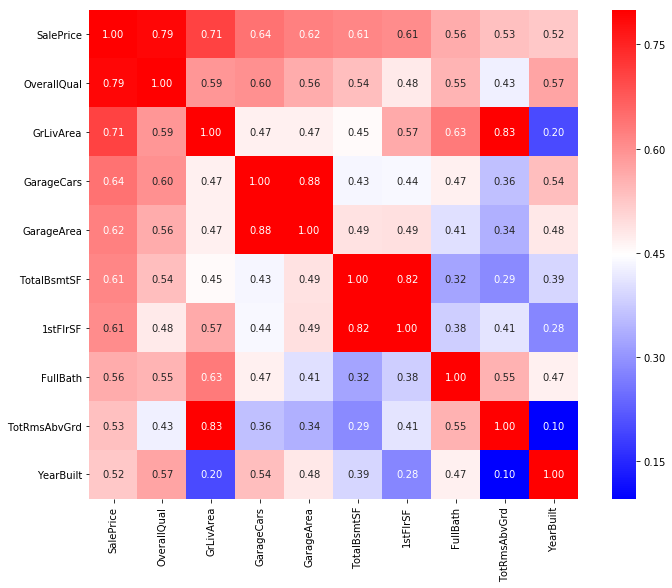

In [17]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("n",['blue','white','red'])
plt.figure(1, figsize=(12,9))
corr = df_train[quants + ['SalePrice']].corr()
cols_quants = corr.nlargest(10, 'SalePrice').index
zoomed_corr = corr.nlargest(10, 'SalePrice')[cols_quants]
sns.heatmap(zoomed_corr, vmax = 0.8, square=True, cmap=cmap, annot = True, fmt='.2f')

In [18]:
### Quantative Variables that have high correlations with 'SalePrice' (>0.5):
cols_quants_ = cols_quants.tolist()
cols_quants_

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [19]:
pairs_quants = []
temp_corr = zoomed_corr.copy()
temp_corr = temp_corr.drop('SalePrice', axis=0).drop('SalePrice', axis=1)
cols_quants_.remove('SalePrice')
for col in (cols_quants_):
    targets = temp_corr[col][temp_corr[col] > 0.8].index 
    for target in targets:
        if target != col:
            pairs_quants.append((col, target, zoomed_corr[col][target]))
    temp_corr = temp_corr.drop(col)

In [20]:
pairs_quants

[('GrLivArea', 'TotRmsAbvGrd', 0.82548937430883773),
 ('GarageCars', 'GarageArea', 0.88247541428146026),
 ('TotalBsmtSF', '1stFlrSF', 0.81952997500503555)]

GarageCars is highly correlated with OverallQual and GarageArea. GrLivArea is highly correlated with FullBath and TotRmsAbvGrd, so we get rid of FullBath, TotRmsAbvGrd and 1stFlrSF:

In [21]:
cols_quants_.remove('FullBath')
cols_quants_.remove('TotRmsAbvGrd')
cols_quants_.remove('GarageCars')
cols_quants_.remove('1stFlrSF')

In [22]:
cols_quants_

['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']

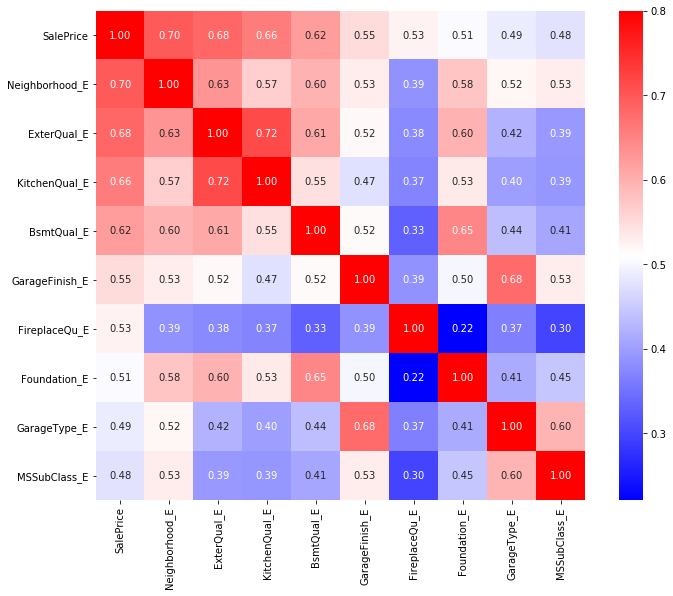

In [23]:
plt.figure(figsize=(12,9))
corr_quals = df_train[qual_encoded + ['SalePrice']].corr()
cols_quals = corr_quals.nlargest(10, 'SalePrice').index
corr_quals_zoomed = corr_quals.nlargest(10, 'SalePrice')[cols_quals]
sns.heatmap(corr_quals_zoomed, annot=True, square=True, fmt='.2f', vmax=0.8, cmap=cmap)

In [24]:
### Qualitative Variables that have high correlations with 'SalePrice' (>0.5):
cols_quals_ = ['Neighborhood_E', 'ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'GarageFinish_E', 'FireplaceQu_E', 'Foundation_E', 'GarageType_E']


In [25]:
pairs_quals = []
temp_corr = corr_quals_zoomed.copy()
temp_corr = temp_corr.drop('SalePrice', axis=0).drop('SalePrice', axis=1)
for col in (cols_quals_):
    targets = temp_corr[col][temp_corr[col] > 0.8].index 
    for target in targets:
        if target != col:
            pairs_quals.append((col, target, temp_corr[col][target]))
    temp_corr = temp_corr.drop(col)
    
pairs_quals

[('Neighborhood_E', 'ExterQual_E', 0.63186991701764916),
 ('ExterQual_E', 'KitchenQual_E', 0.71612219550327849),
 ('ExterQual_E', 'BsmtQual_E', 0.60780001623331259),
 ('BsmtQual_E', 'Foundation_E', 0.64809150189449494),
 ('GarageFinish_E', 'GarageType_E', 0.67829778165850652)]

ExterQual_E is highly correlated with Neighborhood_E, KitchenQual_E, BsmtQual_E. So we remove ExterQual_E, and get rid of Foundation_E and GarageType_E

In [26]:
cols_quals_.remove('ExterQual_E')
cols_quals_.remove('Foundation_E')
cols_quals_.remove('GarageType_E')
cols_quals_

['Neighborhood_E',
 'KitchenQual_E',
 'BsmtQual_E',
 'GarageFinish_E',
 'FireplaceQu_E']

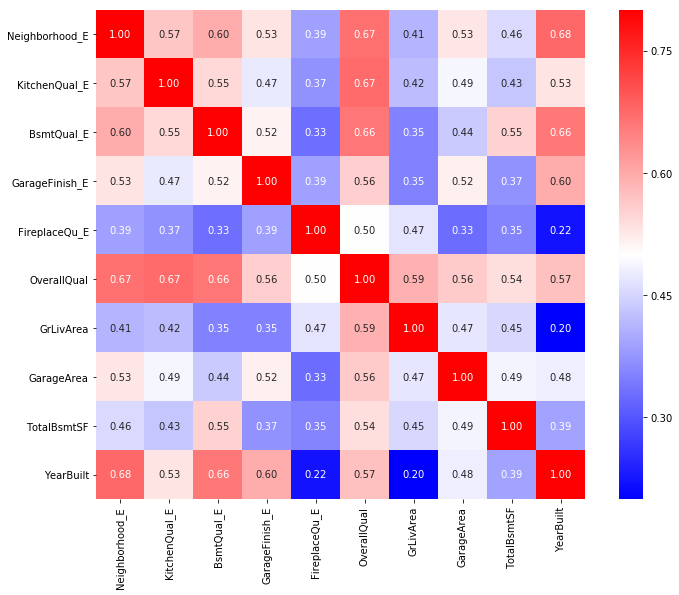

In [27]:
plt.figure(figsize = (12,9))
corr_quals_quants = df_train[cols_quals_+cols_quants_].corr()
sns.heatmap(corr_quals_quants, cmap=cmap, vmax=0.8, fmt='.2f', annot=True, square=True)


In [28]:
pairs_quals_quants = []
temp_corr = corr_quals_quants.copy()
for col in (cols_quals_+cols_quants_):
    targets = temp_corr[col][temp_corr[col] > 0.6].index 
    for target in targets:
        if target != col:
            pairs_quals_quants.append((col, target, temp_corr[col][target]))
    temp_corr = temp_corr.drop(col)
    
pairs_quals_quants

[('Neighborhood_E', 'OverallQual', 0.66764683226306987),
 ('Neighborhood_E', 'YearBuilt', 0.67578040153848196),
 ('KitchenQual_E', 'OverallQual', 0.67333078118778489),
 ('BsmtQual_E', 'OverallQual', 0.66076660335603921),
 ('BsmtQual_E', 'YearBuilt', 0.6574559666538351)]

In [29]:
Final_Variables = cols_quals_+cols_quants_

In [30]:
Final_Variables.remove('OverallQual')
Final_Variables.remove('YearBuilt')

In [31]:
Final_Variables

['Neighborhood_E',
 'KitchenQual_E',
 'BsmtQual_E',
 'GarageFinish_E',
 'FireplaceQu_E',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF']

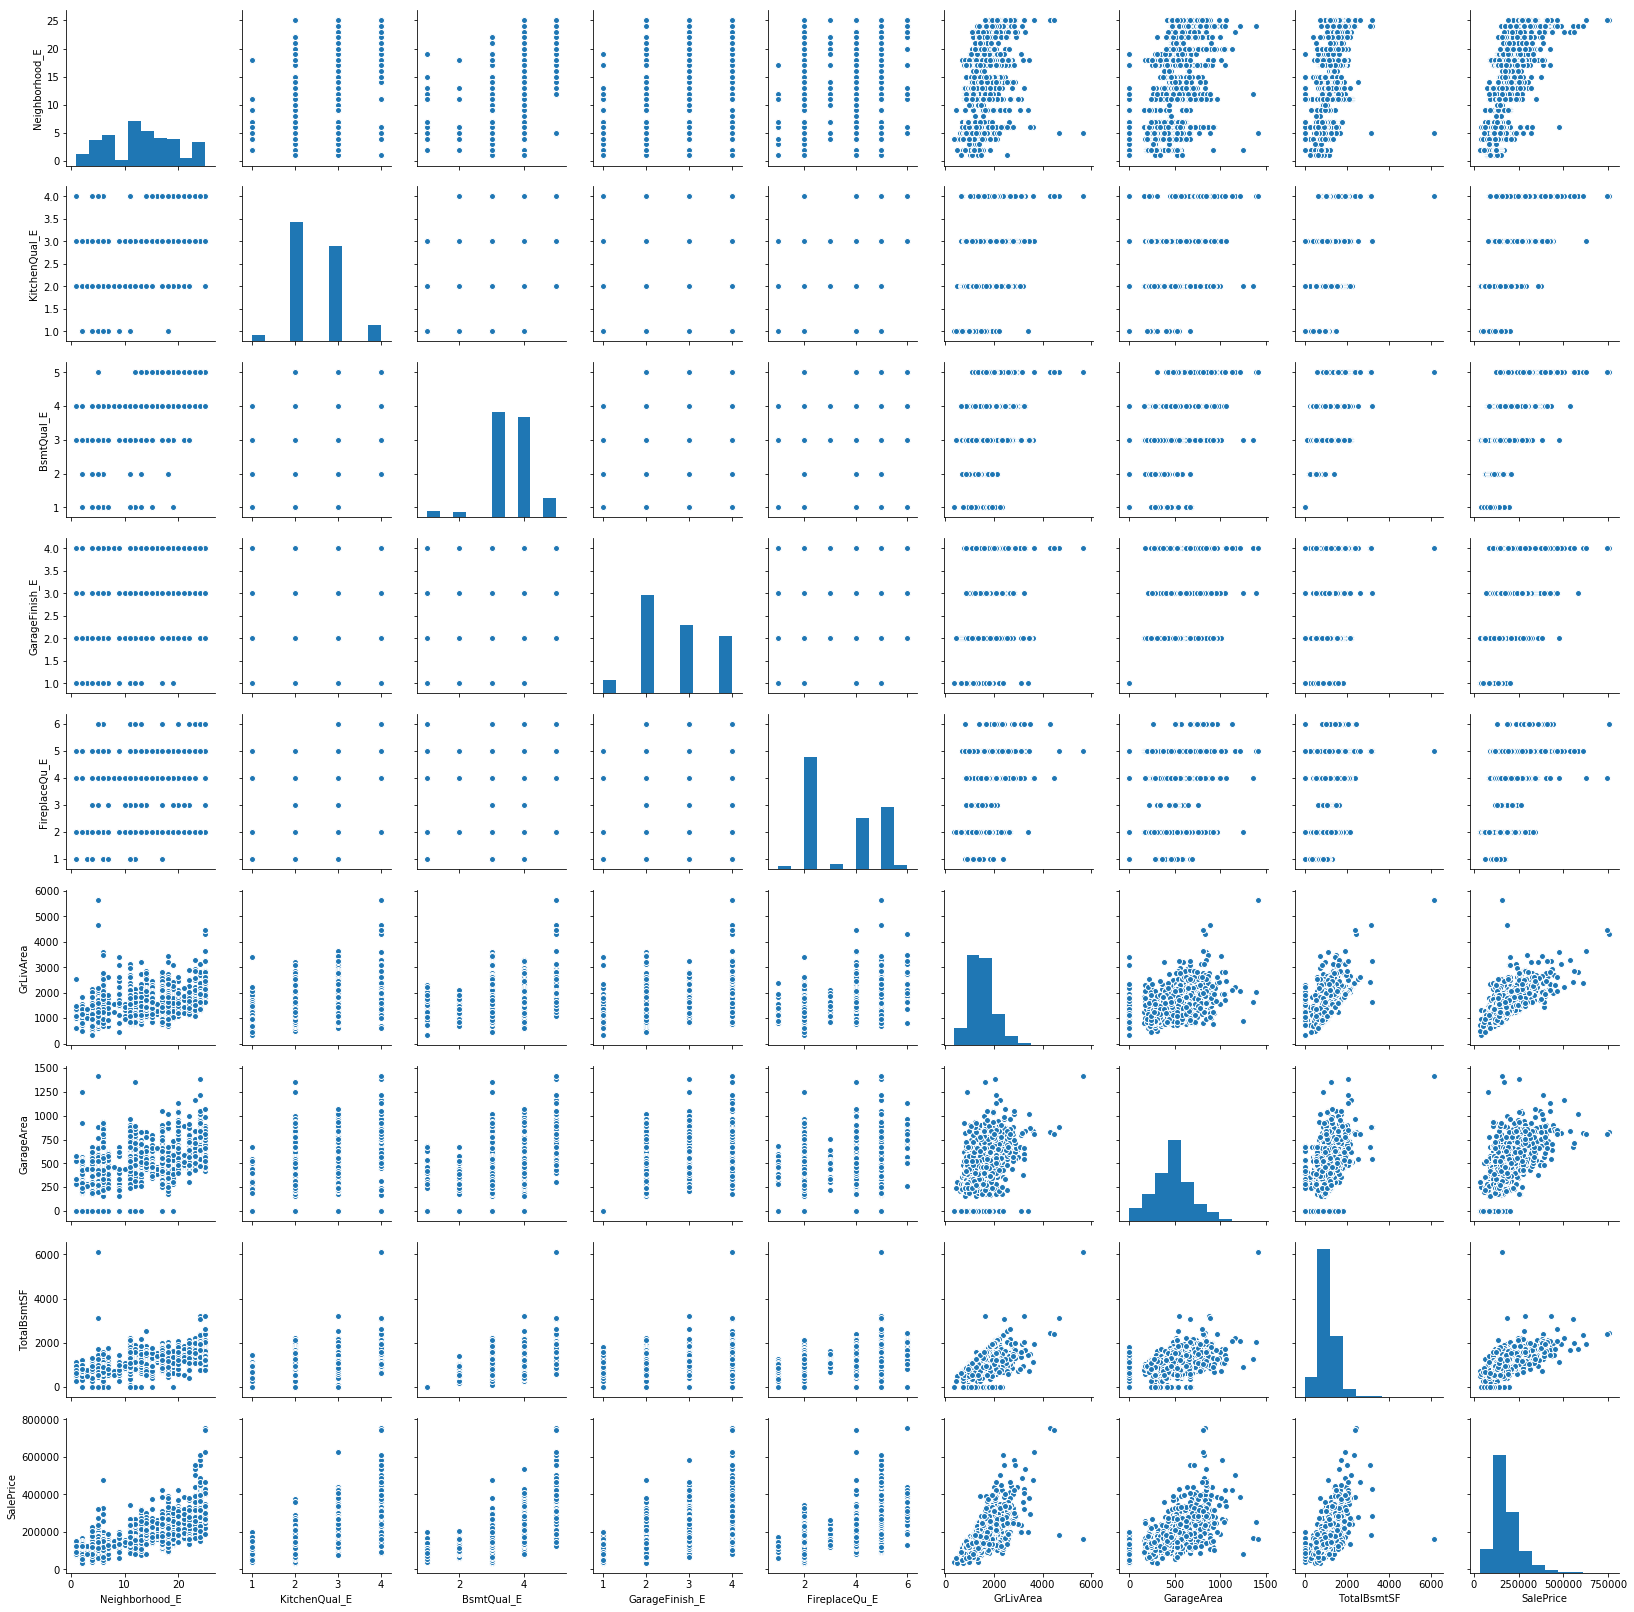

In [32]:
sns.pairplot(df_train[Final_Variables+['SalePrice']])

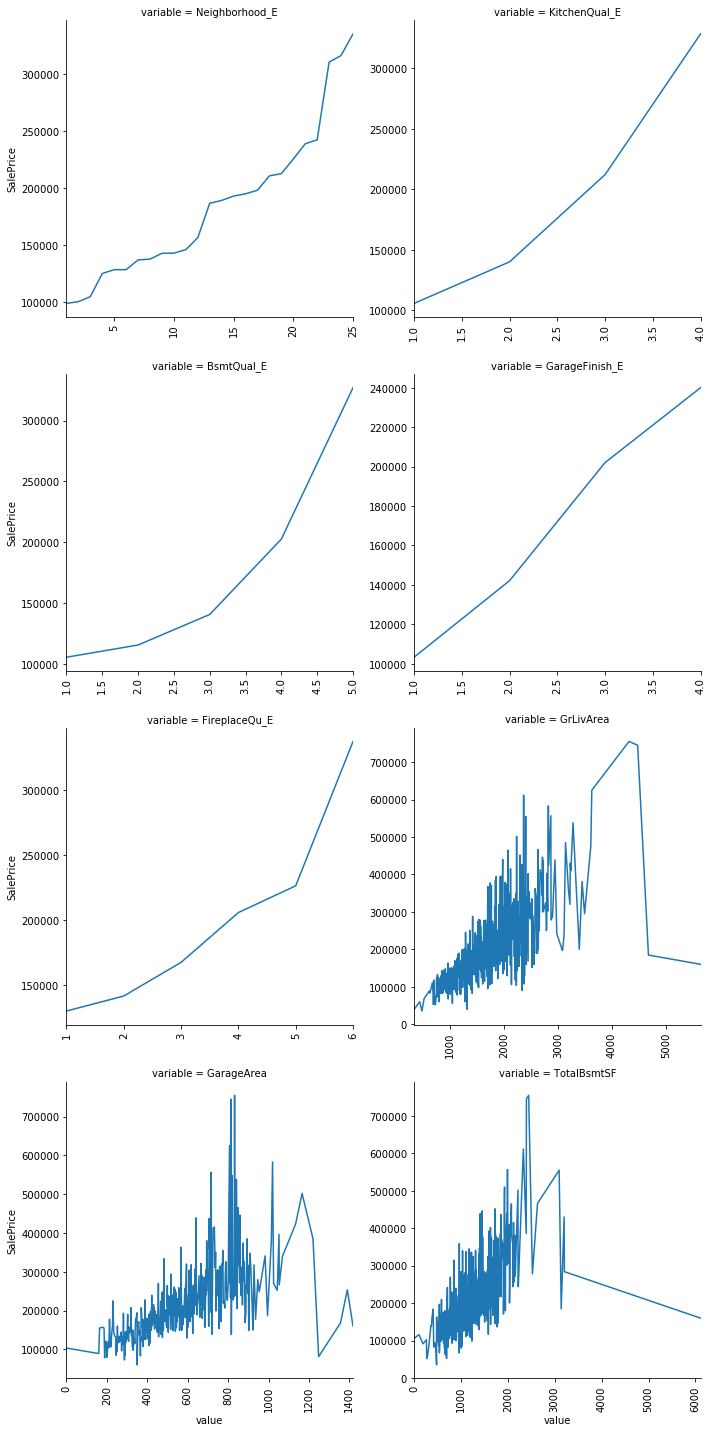

In [43]:
def pairplot(x,y,**kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars = Final_Variables)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

# Models
1. List all variables that have high correlation with the output variable.
2. Keep one of the variables in the pairs that have high colinearities.

#### a. Lasso
1. Select best alpha from GridSearchCV, alpha=[10\**i for i in np.linspace(0.001, 10, 100)].
2. Record best alpha.
3. Record best cv error.
4. Refit to the training set using the best alpha.
5. Predict on testing data.
6. Record testing error.

#### b. Ridge
1. Select best alpha from GridSearchCV, alpha=[10\**i for i in np.linspace(0.001, 10, 100)].
2. Record best alpha.
3. Record best cv error.
4. Refit to the training set using the best alpha.
5. Predict on testing data.
6. Record testing error.

#### c. PCA
1. PCA transformation.
2. CV score for each subset of PCA.
3. Record the best cv error.
3. Fit the full training set on the selected subset of principle components.
4. Predict on testing data.
5. Record testing error.

#### d. Elastic Net (look into it later)

#### e. Non-negative Garrot (look into it later)

### Polynomial Regression (2nd order)

1. Add variables that have high correlation with the output variable to the model.
2. Add quadratic terms with variables that have 
3. Get rid of variables with high colinearlities. 
4. Lasso (or Ridge), Select best alpha from GridSearchCV, alpha=[10\**i for i in np.linspace(0.001, 10, 100)].
5. Record best alpha.
6. Record best cv error.
7. Refit to the training set using the best alpha.
8. Predict on testing data.
9. Record testing error.

### Regression Spline

1. Add variables that have high correlation with the output variable to the model.
2. Add quadratic terms with variables that have 
3. Add spline terms with appropriate knots (degrees of freedom)
3. Get rid of variables with high colinearlities. 
4. sklearn.Linear_models.Lasso (or Ridge), Select best alpha from GridSearchCV, alpha=[10\**i for i in np.linspace(0.001, 10, 100)].
5. Record best alpha.
6. Record best cv error.
7. Refit to the training set using the best alpha.
8. Predict on testing data.
9. Record testing error.

### Random Forest

1. Use the same variables crafted for the linear models
2. sklearn.ensemble.RandomForest, GridSearchCV, params = {'n_estimators': [100, 200, 300, 400, 500], 'max_features'=[0.3, 0.5, 1.0], 'min_samples_split': np.arange(1,10,2)}
3. Record the best params.
4. Record the best cv scores.
5. Refit the tree using the whole dataset.
6. Predict on testing data.
7. Record testing error.

### Gradient Boosting

1. 1. Use the same variables crafted for the linear models
2. sklearn.ensemble.GradientBoostingRegressor, GridSearchCV, params = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth'=[1,2,3], 'min_samples_split': np.arange(1,10,2)}
3. Record the best params.
4. Record the best cv scores.
5. Refit the tree using the whole dataset.
6. Predict on testing data.
7. Record testing error.

## Linear Models

In [49]:
def quadratic(frame, feature):
    frame[feature+'2'] = frame[feature]**2

qdr = []
for feature in Final_Variables:
    quadratic(data, feature)
    qdr.append(feature+'2')
    
data[qdr].head()

,Neighborhood_E2,KitchenQual_E2,BsmtQual_E2,GarageFinish_E2,FireplaceQu_E2,GrLivArea2,GarageArea2,TotalBsmtSF2
0,289.0,9.0,16.0,9.0,4.0,2924100,300304.0,732736.0
1,441.0,4.0,16.0,9.0,16.0,1592644,211600.0,1592644.0
2,289.0,9.0,16.0,9.0,16.0,3189796,369664.0,846400.0
3,324.0,9.0,9.0,4.0,25.0,2948089,412164.0,571536.0
4,625.0,9.0,16.0,9.0,16.0,4831204,698896.0,1311025.0


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [53]:
data.to_csv('Encoded_quadratic_data.csv')

In [54]:
df_train = data.loc[data['SalePrice'].notnull(), :].copy()
df_test = data.loc[data['SalePrice'].isnull(), :].copy()

In [56]:
X_train = df_train[Final_Variables+qdr].as_matrix()
y_train = np.log(df_train['SalePrice'].as_matrix())
X_test = df_test[Final_Variables+qdr].as_matrix()

In [57]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)

(1460, 16)
(1460,)
(1459, 16)


In [58]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
params = {'alpha': [10**i for i in np.linspace(0.001, 10, 100)]}
reg = GridSearchCV(linear_model.Lasso(), params, scoring='neg_mean_squared_error', verbose=3)
reg.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] alpha=1.00230523808 .............................................
[CV] ............. alpha=1.00230523808, score=-0.027811, total=   0.0s
[CV] alpha=1.00230523808 .............................................
[CV] ............. alpha=1.00230523808, score=-0.035480, total=   0.0s
[CV] alpha=1.00230523808 .............................................
[CV] ............. alpha=1.00230523808, score=-0.030120, total=   0.0s
[CV] alpha=1.26473634747 .............................................
[CV] ............. alpha=1.26473634747, score=-0.027875, total=   0.0s
[CV] alpha=1.26473634747 .............................................
[CV] ............. alpha=1.26473634747, score=-0.035575, total=   0.0s
[CV] alpha=1.26473634747 .............................................
[CV] ............. alpha=1.26473634747, score=-0.030679, total=   0.0s
[CV] alpha=1.59587914724 .............................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=32.8095293113 .............................................
[CV] ............. alpha=32.8095293113, score=-0.158669, total=   0.0s
[CV] alpha=41.399967482 ..............................................
[CV] .............. alpha=41.399967482, score=-0.070685, total=   0.0s
[CV] alpha=41.399967482 ..............................................
[CV] .............. alpha=41.399967482, score=-0.082072, total=   0.0s
[CV] alpha=41.399967482 ..............................................
[CV] .............. alpha=41.399967482, score=-0.158670, total=   0.0s
[CV] alpha=52.2396188999 .............................................
[CV] ............. alpha=52.2396188999, score=-0.070686, total=   0.0s
[CV] alpha=52.2396188999 .............................................
[CV] ............. alpha=52.2396188999, score=-0.082070, total=   0.0s
[CV] alpha=52.2396188999 .............................................
[CV] ............. alpha=52.2396188999, score=-0.158672, total=   0.0s
[CV] a

[CV] alpha=13867.5582887 .............................................
[CV] ............. alpha=13867.5582887, score=-0.086310, total=   0.0s
[CV] alpha=13867.5582887 .............................................
[CV] ............. alpha=13867.5582887, score=-0.168573, total=   0.0s
[CV] alpha=17498.4668862 .............................................
[CV] ............. alpha=17498.4668862, score=-0.081456, total=   0.0s
[CV] alpha=17498.4668862 .............................................
[CV] ............. alpha=17498.4668862, score=-0.088881, total=   0.0s
[CV] alpha=17498.4668862 .............................................
[CV] ............. alpha=17498.4668862, score=-0.173537, total=   0.0s
[CV] alpha=22080.0473302 .............................................
[CV] ............. alpha=22080.0473302, score=-0.085974, total=   0.0s
[CV] alpha=22080.0473302 .............................................
[CV] ............. alpha=22080.0473302, score=-0.092990, total=   0.0s
[CV] a

[CV] ............... alpha=2917427.014, score=-0.162506, total=   0.0s
[CV] alpha=2917427.014 ...............................................
[CV] ............... alpha=2917427.014, score=-0.167488, total=   0.0s
[CV] alpha=2917427.014 ...............................................
[CV] ............... alpha=2917427.014, score=-0.148669, total=   0.0s
[CV] alpha=3681289.73643 .............................................
[CV] ............. alpha=3681289.73643, score=-0.162506, total=   0.0s
[CV] alpha=3681289.73643 .............................................
[CV] ............. alpha=3681289.73643, score=-0.167488, total=   0.0s
[CV] alpha=3681289.73643 .............................................
[CV] ............. alpha=3681289.73643, score=-0.148669, total=   0.0s
[CV] alpha=4645152.75223 .............................................
[CV] ............. alpha=4645152.75223, score=-0.162506, total=   0.0s
[CV] alpha=4645152.75223 .............................................
[CV] .

[CV] ............. alpha=1963360276.84, score=-0.167488, total=   0.0s
[CV] alpha=1963360276.84 .............................................
[CV] ............. alpha=1963360276.84, score=-0.148669, total=   0.0s
[CV] alpha=2477422057.63 .............................................
[CV] ............. alpha=2477422057.63, score=-0.162506, total=   0.0s
[CV] alpha=2477422057.63 .............................................
[CV] ............. alpha=2477422057.63, score=-0.167488, total=   0.0s
[CV] alpha=2477422057.63 .............................................
[CV] ............. alpha=2477422057.63, score=-0.148669, total=   0.0s
[CV] alpha=3126079367.12 .............................................
[CV] ............. alpha=3126079367.12, score=-0.162506, total=   0.0s
[CV] alpha=3126079367.12 .............................................
[CV] ............. alpha=3126079367.12, score=-0.167488, total=   0.0s
[CV] alpha=3126079367.12 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0023052380778996, 1.2647363474711513, 1.5958791472367326, 2.0137242498623884, 2.5409727055493052, 3.2062693245054659, 4.0457589169744272, 5.1050499997540637, 6.4416926551517735, 8.1283051616409931, 10.256519262514074, 12.941958414499856, 16.330519478943348, 20.606299132700006...495, 3944573020.7527847, 4977370849.7893705, 6280583588.1331797, 7925013304.8047342, 10000000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=3)

In [59]:
y_pred = np.exp(reg.predict(X_test))

In [60]:
y_pred

array([ 132274.3573715 ,  150736.28219488,  176232.99793745, ...,
        158058.11468882,  107469.13346212,  198155.83412351])

In [64]:
best_alpha = reg.best_params_['alpha']

In [65]:
reg.best_score_

-0.031137819989083791

In [67]:
reg = linear_model.Lasso(alpha=best_alpha)
reg.fit(X_train, y_train)
y_pred = np.exp(reg.predict(X_test))

In [68]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('Quadratic.csv', index=False)

Conclusion: After I have done so much in it, it doesnot give a very good way of selecting a good subset of variables.